In [16]:
#importing required liabraries....... 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# importing_csv_file............
data = pd.read_csv("D:\project\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv",encoding="unicode_escape")


#Data_cleaning..........

#Removing unwanted column from data
data.drop(["Status","unnamed1"],axis=1,inplace=True)

#checking null values in data
pd.isnull(data).sum()


#removing null values from data
data.dropna(inplace= True)

#Amount type is in float ...So changing float into Integer.....
data['Amount'] = data['Amount'].astype(int)





Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')


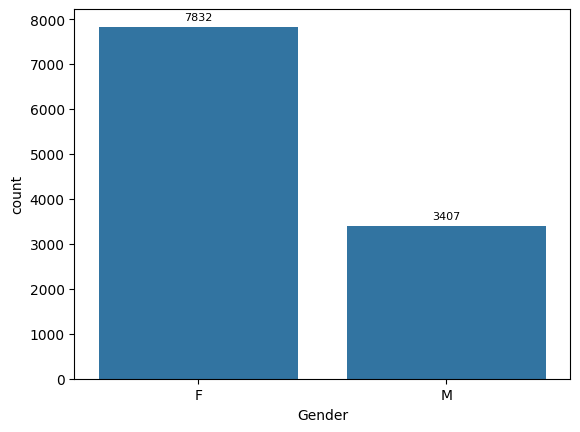

In [23]:
#Exploratory Data Analysis...[EDA]


#Plotting a Bar chart for Gender and it's count......
Gen = sns.countplot(x="Gender",data = data)

for bars in Gen.containers:
    Gen.bar_label(bars, padding=3, fontsize= 8)




  Gender    Amount
0      F  74335853
1      M  31913276


<Axes: xlabel='Gender', ylabel='Amount'>

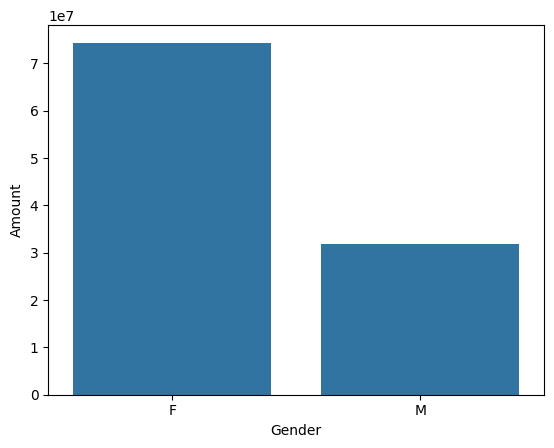

In [42]:
#plotting a Bar Chart  for Gender vs Total Amount:

G_vs_T = data.groupby(["Gender"], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
print(G_vs_T)
sns.barplot(x= "Gender",y= "Amount",data = G_vs_T)

Axes(0.125,0.11;0.775x0.77)


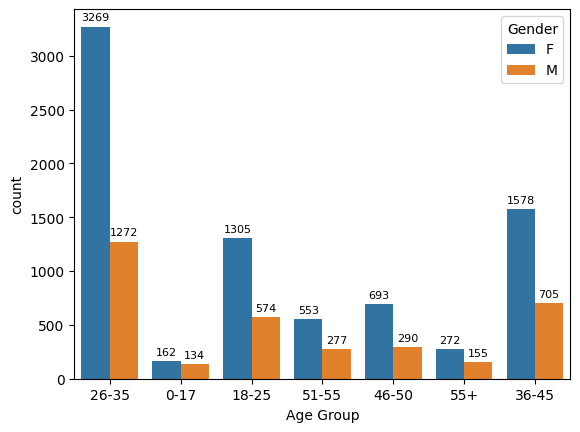

In [41]:
#Plotting for which age group people buy more with respect to gender

ax = sns.countplot(data = data, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars,padding=3,fontsize=8)

  Age Group    Amount
0      0-17   2699653
6       55+   4080987
5     51-55   8261477
4     46-50   9207844
1     18-25  17240732
3     36-45  22144994
2     26-35  42613442


<Axes: xlabel='Age Group', ylabel='Amount'>

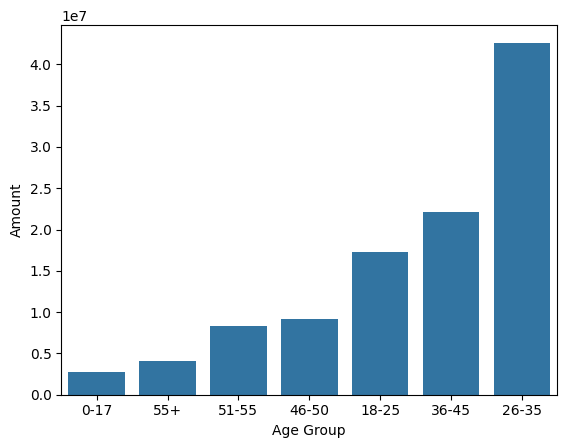

In [39]:
# Total Amount vs Age Group
sales_age = data.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=True)
print(sales_age)
sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

               State    Amount
14     Uttar Pradesh  19374968
10       Maharashtra  14427543
7          Karnataka  13523540
2              Delhi  11603818
9     Madhya Pradesh   8101142
0     Andhra Pradesh   8037146
5   Himachal Pradesh   4963368
4            Haryana   4220175
1              Bihar   4022757
3            Gujarat   3946082


<Axes: xlabel='State', ylabel='Amount'>

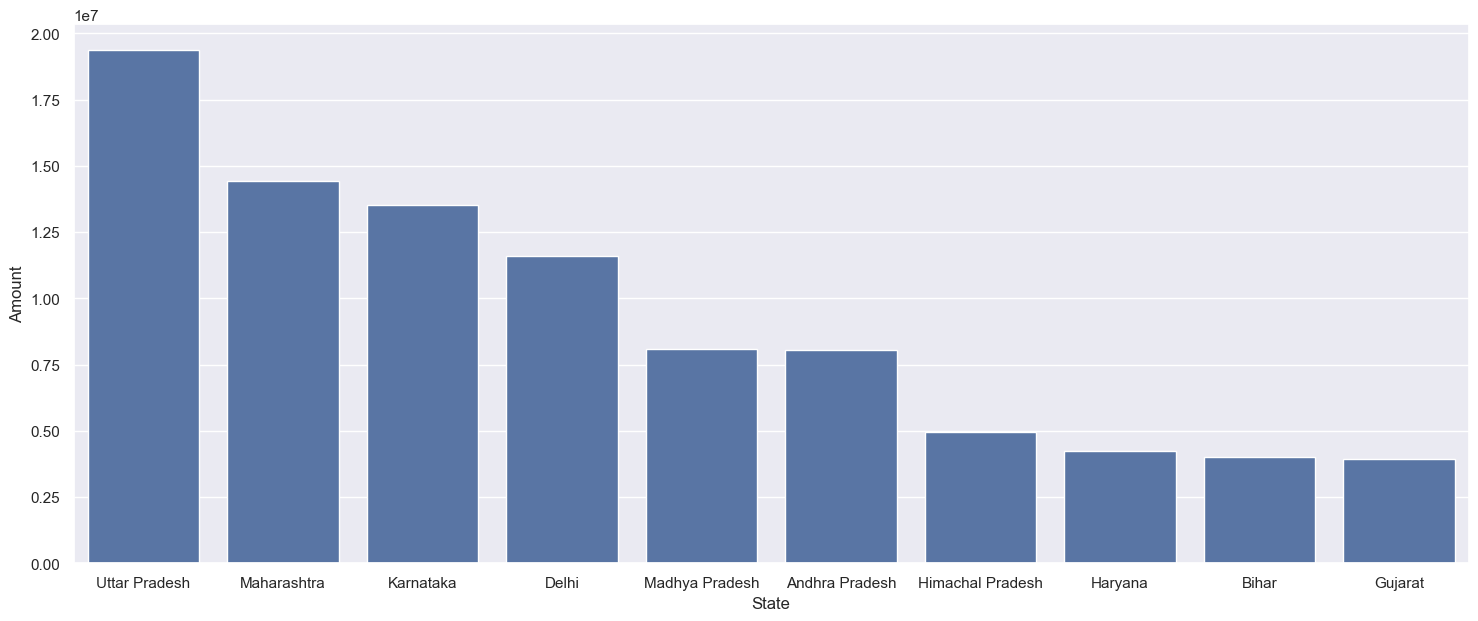

In [48]:
# total amount/sales from top 10 states

top_states= data.groupby(["State"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
print(top_states)

sns.set(rc={"figure.figsize":(18,7)})
sns.barplot(x="State",y="Amount",data = top_states)

               State  Orders
14     Uttar Pradesh    4807
10       Maharashtra    3810
7          Karnataka    3240
2              Delhi    2740
9     Madhya Pradesh    2252
0     Andhra Pradesh    2051
5   Himachal Pradesh    1568
8             Kerala    1137
4            Haryana    1109
3            Gujarat    1066


<Axes: xlabel='State', ylabel='Orders'>

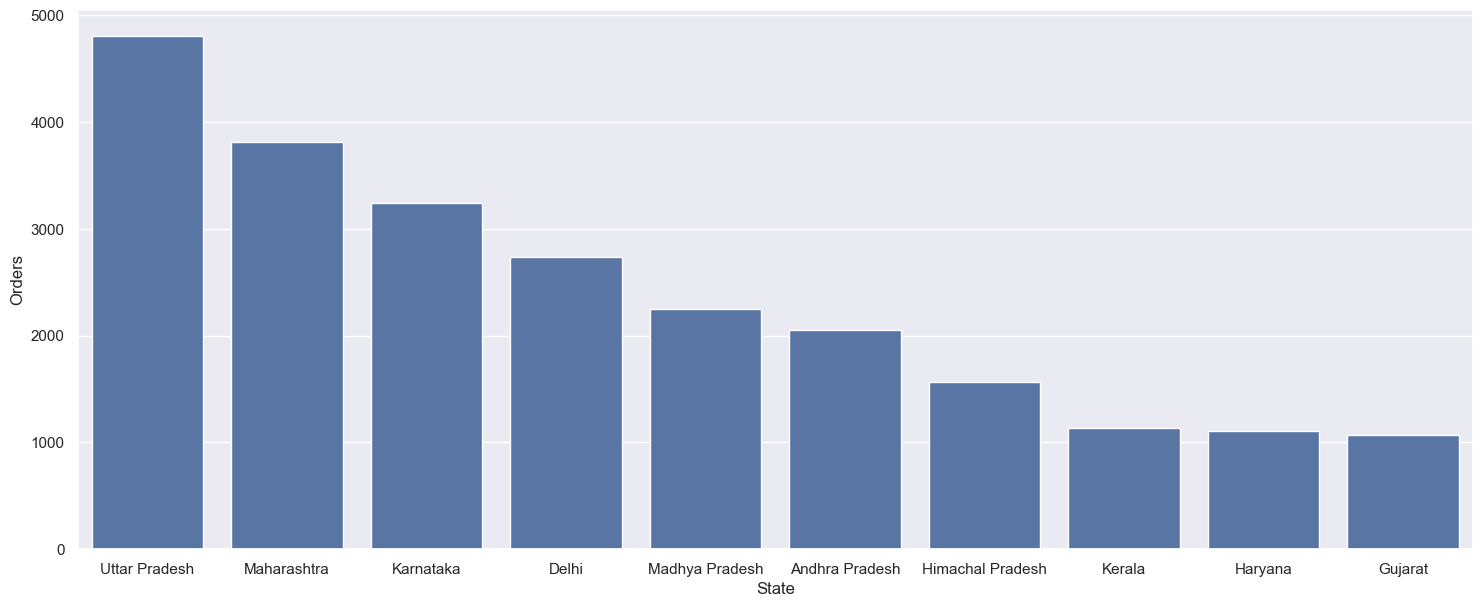

In [52]:
# total number of orders from top 10 states....

sales_state = data.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by="Orders",ascending=False).head(10)
print(sales_state.head(10))

sns.set(rc={'figure.figsize':(18,7)})
sns.barplot(data=sales_state,x="State",y="Orders")

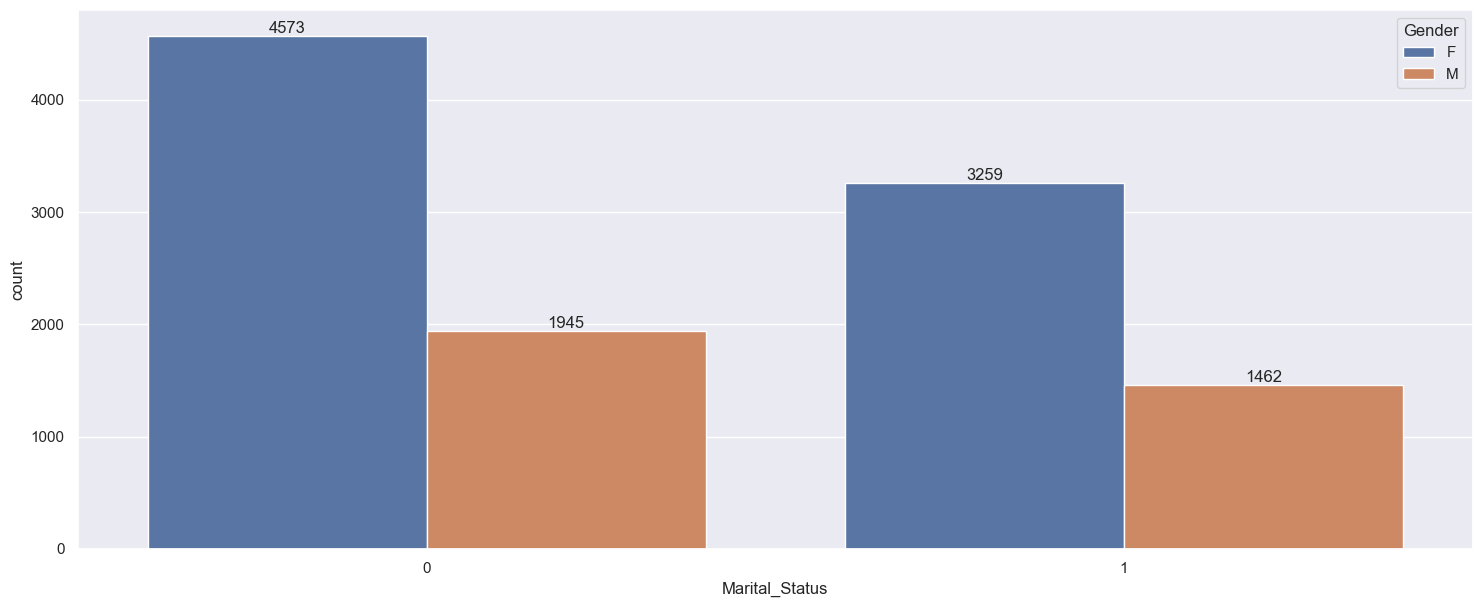

In [53]:
#Marital_status of buyers respect to genders.....

x =  sns.countplot(data= data, x= "Marital_Status",hue="Gender")

sns.set({"figure.figsize":(18,7)})
for bars in x.containers:
    x.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

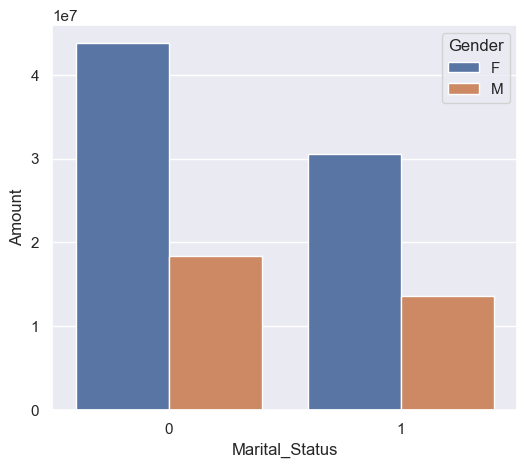

In [54]:
#Martial status / Total amount......

sales_state = data.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

<Axes: xlabel='Marital_Status', ylabel='Amount'>

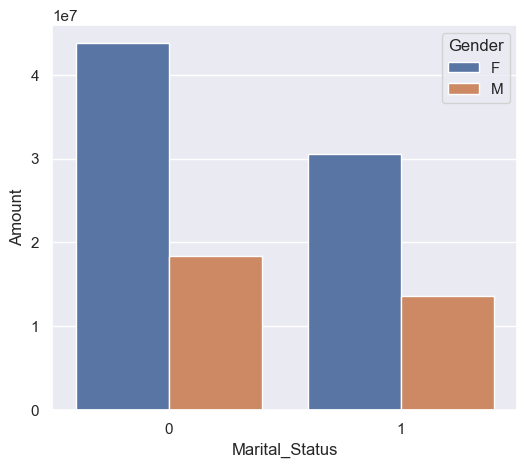

In [ ]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

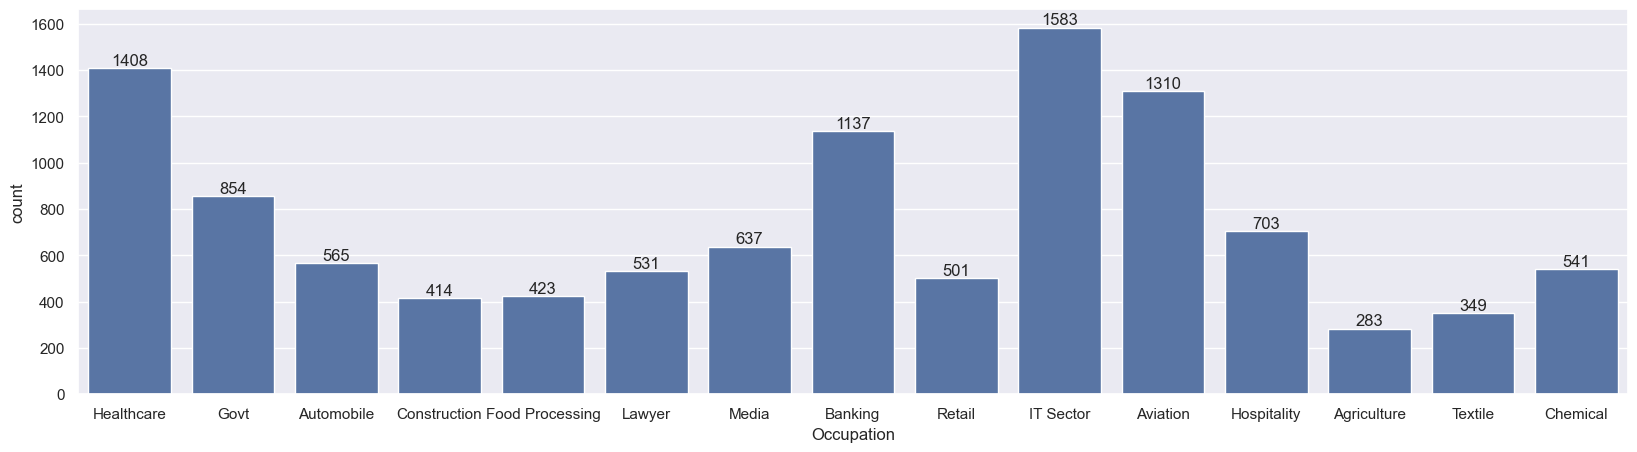

In [56]:
#Occupations

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = data, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

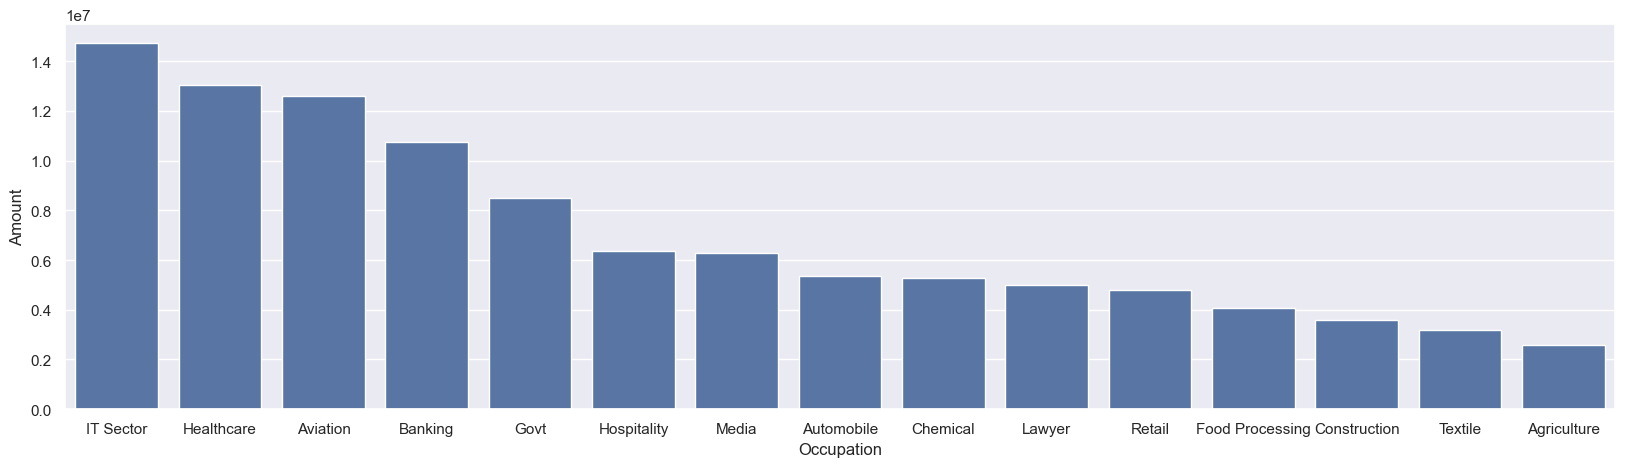

In [57]:
#Occupation / Total Amount......

sales_state = data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

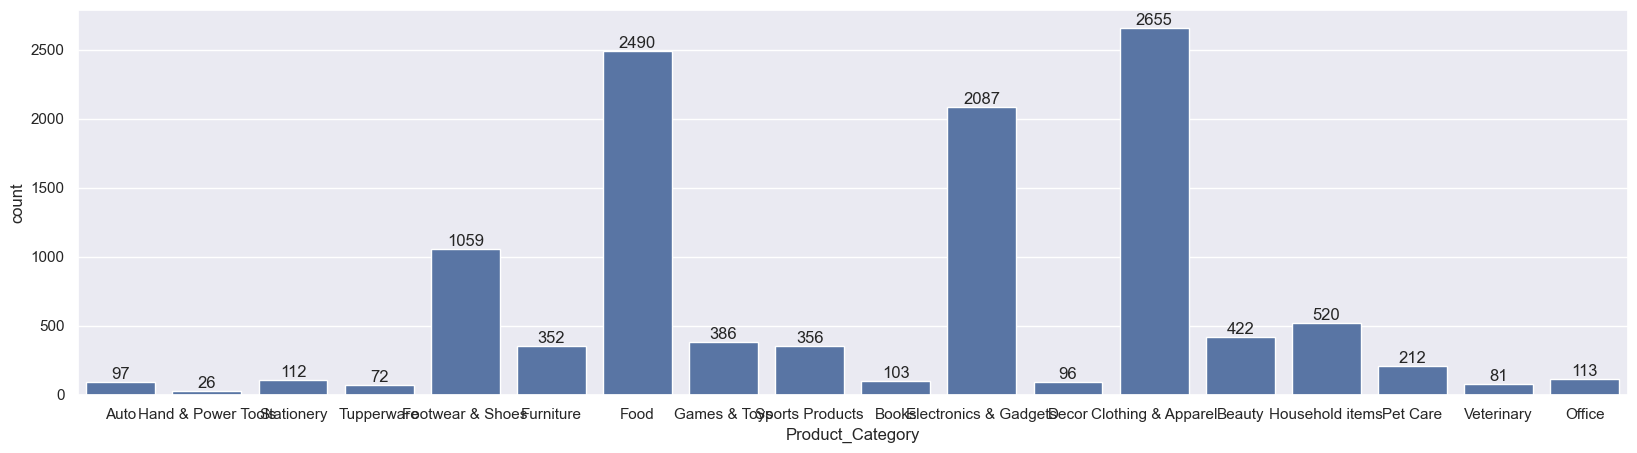

In [58]:
#Product Category.....

sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = data, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

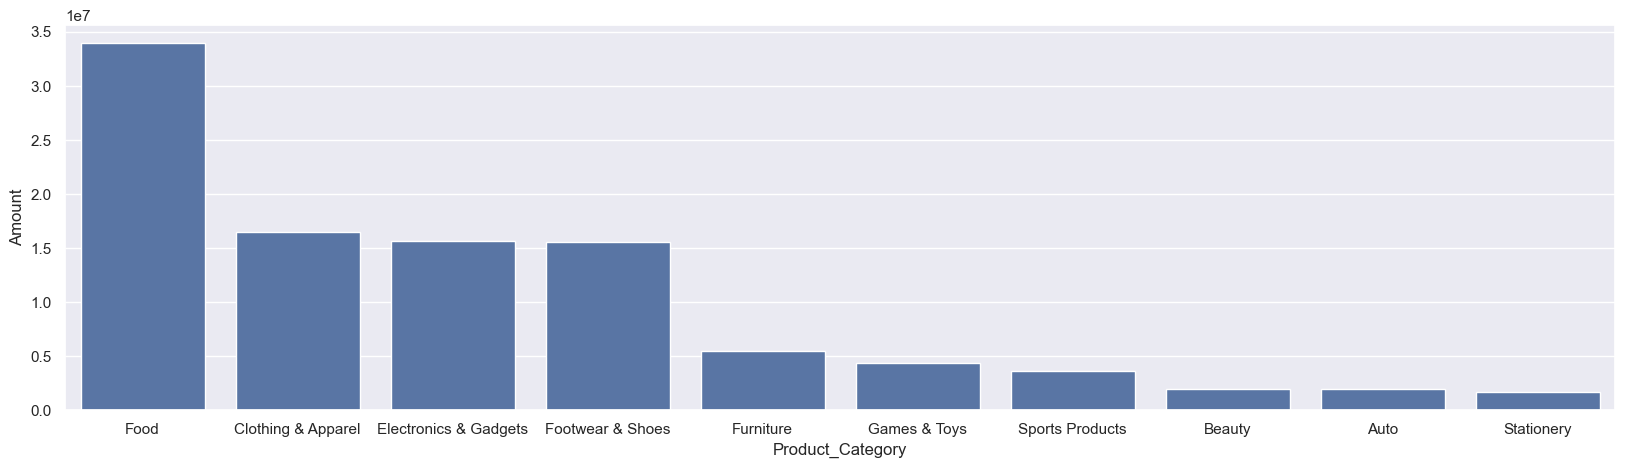

In [59]:
#Product / Total Amount......

sales_state = data.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

<Axes: xlabel='Product_ID', ylabel='Orders'>

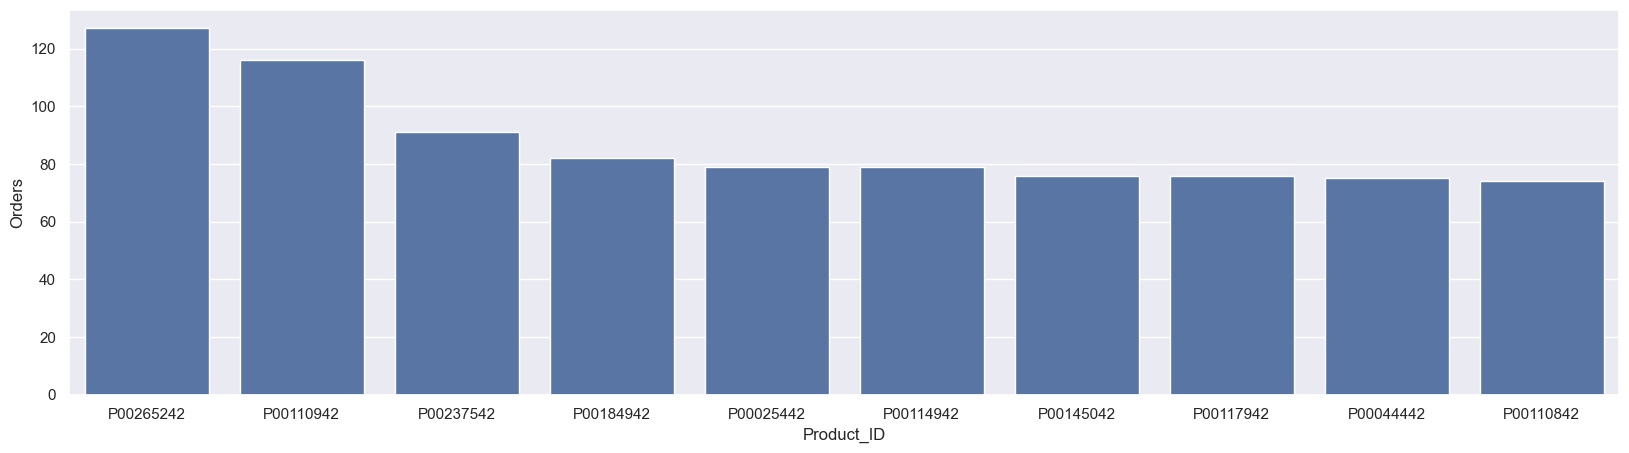

In [60]:
#Product_Id / orders

sales_state = data.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID'>

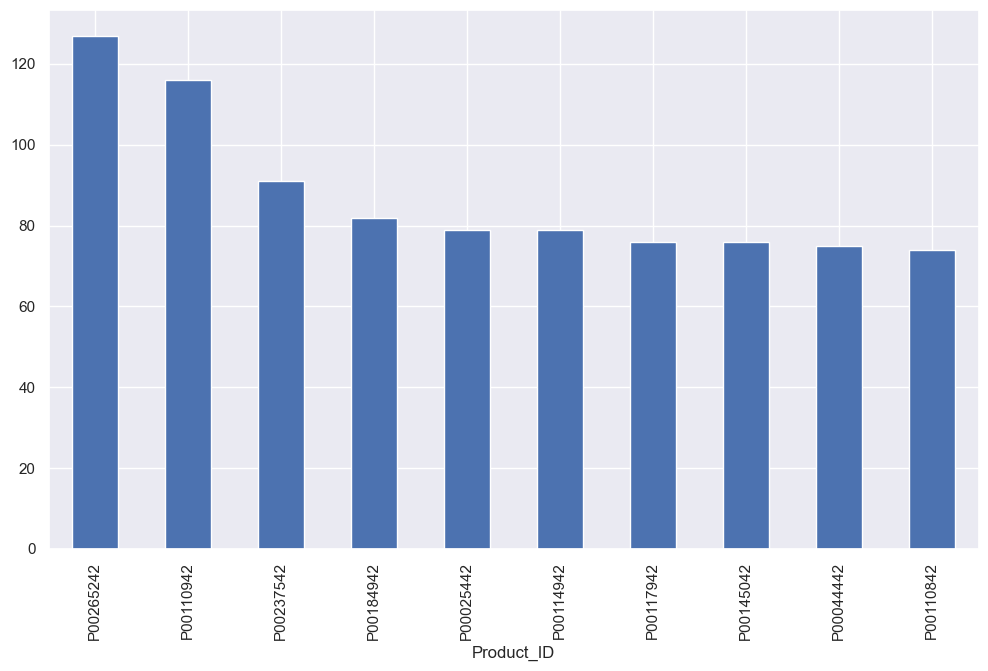

In [62]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
data.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Conclusion:

### 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*